In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv("PropertyPrice_Data.csv")

In [3]:
print('No of records in data: ',data.shape[0])
print('No of columns in data: ',data.shape[1])

No of records in data:  1459
No of columns in data:  26


In [4]:
# Viewing first 10 rows of the data
data.head(10)

Id Road_Type Property_Shape House_Type  House_Condition  Construction_Year  \
0   1     Paved            Reg       1Fam                5               2003   
1   2     Paved            Reg       1Fam                8               1976   
2   3     Paved            IR1       1Fam                5               2001   
3   4     Paved            IR1       1Fam                5               1915   
4   5     Paved            IR1       1Fam                5               2000   
5   6     Paved            IR1       1Fam                5               1993   
6   7     Paved            Reg       1Fam                5               2004   
7   8     Paved            IR1       1Fam                6               1973   
8   9     Paved            Reg       1Fam                5               1931   
9  10     Paved            Reg     2fmCon                6               1939   

   Remodel_Year  BsmtFinSF1  Total_Basement_Area Air_Conditioning  ...  \
0          2003         706                  856                Y  ...   
1          1976         978                 1262                Y  ...   
2          2002         486                  920                Y  ...   
3          1970         216                  756                Y  ...   
4          2000         655                 1145                Y  ...   
5          1995         732                  796                Y  ...   
6          2005        1369                 1686                Y  ...   
7          1973         859                 1107                Y  ...   
8          1950           0                  952                Y  ...   
9          1950         851                  991                Y  ...   

   Kitchen_Quality  Rooms_Above_Grade  Fireplaces  Garage  Garage_Built_Year  \
0               Gd                  8           0  Attchd             2003.0   
1               TA                  6           1  Attchd             1976.0   
2               Gd                  6           1  Attchd             2001.0   
3               Gd                  7           1  Detchd             1998.0   
4               Gd                  9           1  Attchd             2000.0   
5               TA                  5           0  Attchd             1993.0   
6               Gd                  7           1  Attchd             2004.0   
7               TA                  7           2  Attchd             1973.0   
8               TA                  8           2  Detchd             1931.0   
9               TA                  5           2  Attchd             1939.0   

   Garage_Area Pool_Area  Miscellaneous_Value  Year_Sold Sale_Price  
0  1085.793744         0                    0       2008     208500  
1   196.316304         0                    0       2007     181500  
2   218.068403         0                    0       2008     223500  
3   696.996439         0                    0       2006     140000  
4   568.859882         0                    0       2008     250000  
5   703.481359         0                  700       2009     143000  
6   555.415694         0                    0       2007     307000  
7   737.632993         0                  350       2009     200000  
8   424.620043         0                    0       2008     129900  
9   632.539240         0                    0       2008     118000  

[10 rows x 26 columns]

In [5]:
# Viewing last 10 rows of the data
data.tail(10)

Id Road_Type Property_Shape House_Type  House_Condition  \
1449  1450     Paved            Reg      Twnhs                7   
1450  1451     Paved            Reg     Duplex                5   
1451  1452     Paved            Reg       1Fam                5   
1452  1453     Paved            Reg     TwnhsE                5   
1453  1454     Paved            Reg       1Fam                5   
1454  1455     Paved            Reg       1Fam                5   
1455  1456     Paved            Reg       1Fam                5   
1456  1457     Paved            Reg       1Fam                6   
1457  1458     Paved            Reg       1Fam                9   
1458  1459     Paved            Reg       1Fam                6   

      Construction_Year  Remodel_Year  BsmtFinSF1  Total_Basement_Area  \
1449               1970          1970         553                  630   
1450               1974          1974           0                  896   
1451               2008          2009           0                 1573   
1452               2005          2005         547                  547   
1453               2006          2006           0                 1140   
1454               2004          2005         410                 1221   
1455               1999          2000           0                  953   
1456               1978          1988         790                 1542   
1457               1941          2006         275                 1152   
1458               1950          1996          49                 1078   

     Air_Conditioning  ...  Kitchen_Quality  Rooms_Above_Grade  Fireplaces  \
1449                Y  ...               Ex                  3           0   
1450                Y  ...               TA                  8           0   
1451                Y  ...               Ex                  7           1   
1452                Y  ...               TA                  5           0   
1453                Y  ...               TA                  6           0   
1454                Y  ...               Gd                  6           0   
1455                Y  ...               TA                  7           1   
1456                Y  ...               TA                  7           2   
1457                Y  ...               Gd                  9           2   
1458                Y  ...               Gd                  5           0   

       Garage  Garage_Built_Year  Garage_Area Pool_Area  Miscellaneous_Value  \
1449      NaN                NaN   349.820761         0                    0   
1450      NaN                NaN   334.367666         0                    0   
1451   Attchd             2008.0   763.660221         0                    0   
1452  Basment             2005.0   514.423635         0                    0   
1453      NaN                NaN   538.606473         0                    0   
1454   Attchd             2004.0   689.060909         0                    0   
1455   Attchd             1999.0   644.100240         0                    0   
1456   Attchd             1978.0   180.864203         0                    0   
1457   Attchd             1941.0   439.363996         0                 2500   
1458   Attchd             1950.0   603.143692         0                    0   

      Year_Sold Sale_Price  
1449       2006      92000  
1450       2009     136000  
1451       2009     287090  
1452       2006     145000  
1453       2006      84500  
1454       2009     185000  
1455       2007     175000  
1456       2010     210000  
1457       2010     266500  
1458       2010     142125  

[10 rows x 26 columns]

In [6]:
# Viewing random 5 rows of the data
data.sample(5)

Id Road_Type Property_Shape House_Type  House_Condition  \
174    175     Paved            IR1       1Fam                5   
657    658     Paved            Reg       1Fam                6   
1437  1438     Paved            Reg       1Fam                5   
1412  1413     Paved            Reg     Duplex                5   
125    126     Paved            Reg     2fmCon                8   

      Construction_Year  Remodel_Year  BsmtFinSF1  Total_Basement_Area  \
174                1986          1986        1398                 1606   
657                1931          2000           0                  776   
1437               2008          2008        1336                 1932   
1412               1949          1950           0                    0   
125                1935          1982         490                  520   

     Air_Conditioning  ...  Kitchen_Quality  Rooms_Above_Grade  Fireplaces  \
174                 Y  ...               TA                  7           1   
657                 Y  ...               TA                  6           1   
1437                Y  ...               Ex                  7           1   
1412                N  ...               TA                  6           0   
125                 N  ...               TA                  5           0   

      Garage  Garage_Built_Year  Garage_Area Pool_Area  Miscellaneous_Value  \
174   Attchd             1986.0   542.401023         0                    0   
657   Attchd             1931.0   388.998621         0                    0   
1437  Attchd             2008.0   148.973282         0                    0   
1412  Detchd             1956.0   332.809672         0                    0   
125      NaN                NaN   351.720663         0                    0   

      Year_Sold Sale_Price  
174        2008     184000  
657        2008     149000  
1437       2008     394617  
1412       2009      90000  
125        2006      84500  

[5 rows x 26 columns]

In [7]:
# Viewing the list of all the columns in this dataset
data.columns

Index(['Id', 'Road_Type', 'Property_Shape', 'House_Type', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'BsmtFinSF1',
       'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Quality',
       'Rooms_Above_Grade', 'Fireplaces', 'Garage', 'Garage_Built_Year',
       'Garage_Area', 'Pool_Area', 'Miscellaneous_Value', 'Year_Sold',
       'Sale_Price'],
      dtype='object')

In [8]:
data.dtypes

Id                             int64
Road_Type                     object
Property_Shape                object
House_Type                    object
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
BsmtFinSF1                     int64
Total_Basement_Area            int64
Air_Conditioning              object
First_Floor_Area               int64
Second_Floor_Area              int64
LowQualFinSF                   int64
Underground_Full_Bathroom      int64
Full_Bathroom_Above_Grade      int64
Bedroom_Above_Grade            int64
Kitchen_Quality               object
Rooms_Above_Grade              int64
Fireplaces                     int64
Garage                        object
Garage_Built_Year            float64
Garage_Area                  float64
Pool_Area                      int64
Miscellaneous_Value            int64
Year_Sold                      int64
Sale_Price                     int64
dtype: object

In [9]:
# Mathematical look of the data
data.describe()

Id  House_Condition  Construction_Year  Remodel_Year  \
count  1459.000000      1459.000000        1459.000000   1459.000000   
mean    730.000000         5.575051        1971.272104   1984.879369   
std     421.321334         1.113125          30.212814     20.645927   
min       1.000000         1.000000        1872.000000   1950.000000   
25%     365.500000         5.000000        1954.000000   1967.000000   
50%     730.000000         5.000000        1973.000000   1994.000000   
75%    1094.500000         6.000000        2000.000000   2004.000000   
max    1459.000000         9.000000        2010.000000   2010.000000   

        BsmtFinSF1  Total_Basement_Area  First_Floor_Area  Second_Floor_Area  \
count  1459.000000          1459.000000       1459.000000        1459.000000   
mean    443.374914          1057.293352       1162.562714         347.230295   
std     456.142186           438.824912        386.712553         436.583480   
min       0.000000             0.000000        334.000000           0.000000   
25%       0.000000           795.500000        882.000000           0.000000   
50%     383.000000           991.000000       1086.000000           0.000000   
75%     712.000000          1298.500000       1391.500000         728.000000   
max    5644.000000          6110.000000       4692.000000        2065.000000   

       LowQualFinSF  Underground_Full_Bathroom  Full_Bathroom_Above_Grade  \
count   1459.000000                1459.000000                1459.000000   
mean       5.848526                   0.424949                   1.565456   
std       48.639512                   0.518870                   0.550906   
min        0.000000                   0.000000                   0.000000   
25%        0.000000                   0.000000                   1.000000   
50%        0.000000                   0.000000                   2.000000   
75%        0.000000                   1.000000                   2.000000   
max      572.000000                   3.000000                   3.000000   

       Bedroom_Above_Grade  Rooms_Above_Grade   Fireplaces  Garage_Built_Year  \
count          1459.000000        1459.000000  1459.000000        1378.000000   
mean              2.866347           6.518163     0.613434        1978.515965   
std               0.816050           1.625894     0.644687          24.696004   
min               0.000000           2.000000     0.000000        1900.000000   
25%               2.000000           5.000000     0.000000        1961.000000   
50%               3.000000           6.000000     1.000000        1980.000000   
75%               3.000000           7.000000     1.000000        2002.000000   
max               8.000000          14.000000     3.000000        2010.000000   

       Garage_Area    Pool_Area  Miscellaneous_Value    Year_Sold  \
count  1459.000000  1459.000000          1459.000000  1459.000000   
mean    470.934787     2.760795            43.518849  2007.815627   
std     210.668787    40.191018           496.291826     1.328542   
min    -129.369350     0.000000             0.000000  2006.000000   
25%     329.290489     0.000000             0.000000  2007.000000   
50%     471.028116     0.000000             0.000000  2008.000000   
75%     607.184977     0.000000             0.000000  2009.000000   
max    1147.488093   738.000000         15500.000000  2010.000000   

          Sale_Price  
count    1459.000000  
mean   180944.102810  
std     79464.918335  
min     34900.000000  
25%    129950.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000

In [10]:
data.describe(include='object').T

count unique     top  freq
Road_Type         1459      2   Paved  1453
Property_Shape    1459      4     Reg   924
House_Type        1459      5    1Fam  1219
Air_Conditioning  1459      2       Y  1364
Kitchen_Quality   1459      4      TA   734
Garage            1378      7  Attchd   869

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Road_Type                  1459 non-null   object 
 2   Property_Shape             1459 non-null   object 
 3   House_Type                 1459 non-null   object 
 4   House_Condition            1459 non-null   int64  
 5   Construction_Year          1459 non-null   int64  
 6   Remodel_Year               1459 non-null   int64  
 7   BsmtFinSF1                 1459 non-null   int64  
 8   Total_Basement_Area        1459 non-null   int64  
 9   Air_Conditioning           1459 non-null   object 
 10  First_Floor_Area           1459 non-null   int64  
 11  Second_Floor_Area          1459 non-null   int64  
 12  LowQualFinSF               1459 non-null   int64  
 13  Underground_Full_Bathroom  1459 non-null   int64

In [12]:
# Number of null values in each column
data.isnull().sum()

Id                            0
Road_Type                     0
Property_Shape                0
House_Type                    0
House_Condition               0
Construction_Year             0
Remodel_Year                  0
BsmtFinSF1                    0
Total_Basement_Area           0
Air_Conditioning              0
First_Floor_Area              0
Second_Floor_Area             0
LowQualFinSF                  0
Underground_Full_Bathroom     0
Full_Bathroom_Above_Grade     0
Bedroom_Above_Grade           0
Kitchen_Quality               0
Rooms_Above_Grade             0
Fireplaces                    0
Garage                       81
Garage_Built_Year            81
Garage_Area                   0
Pool_Area                     0
Miscellaneous_Value           0
Year_Sold                     0
Sale_Price                    0
dtype: int64

In [13]:
# Checking the percentage of null values 
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Garage_Built_Year            5.551748
Garage                       5.551748
Id                           0.000000
Road_Type                    0.000000
Year_Sold                    0.000000
Miscellaneous_Value          0.000000
Pool_Area                    0.000000
Garage_Area                  0.000000
Fireplaces                   0.000000
Rooms_Above_Grade            0.000000
Kitchen_Quality              0.000000
Bedroom_Above_Grade          0.000000
Full_Bathroom_Above_Grade    0.000000
Underground_Full_Bathroom    0.000000
LowQualFinSF                 0.000000
Second_Floor_Area            0.000000
First_Floor_Area             0.000000
Air_Conditioning             0.000000
Total_Basement_Area          0.000000
BsmtFinSF1                   0.000000
Remodel_Year                 0.000000
Construction_Year            0.000000
House_Condition              0.000000
House_Type                   0.000000
Property_Shape               0.000000
Sale_Price                   0.000000
dtype: float

In [14]:
# Garage & Garage_Built_Year
data["Garage"]=data["Garage"].fillna(data["Garage"].mode()[0])

# Garage_Bulit_Year
data["Garage_Built_Year"].fillna(data["Garage_Built_Year"].median(),inplace=True)

data.isna().sum()

Id                           0
Road_Type                    0
Property_Shape               0
House_Type                   0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
BsmtFinSF1                   0
Total_Basement_Area          0
Air_Conditioning             0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Underground_Full_Bathroom    0
Full_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Quality              0
Rooms_Above_Grade            0
Fireplaces                   0
Garage                       0
Garage_Built_Year            0
Garage_Area                  0
Pool_Area                    0
Miscellaneous_Value          0
Year_Sold                    0
Sale_Price                   0
dtype: int64

In [15]:
# Checking for duplicate number of rows in the data
data.duplicated().sum()

0

In [16]:
# remove identifer columns
data=data.drop("Id",axis=1)

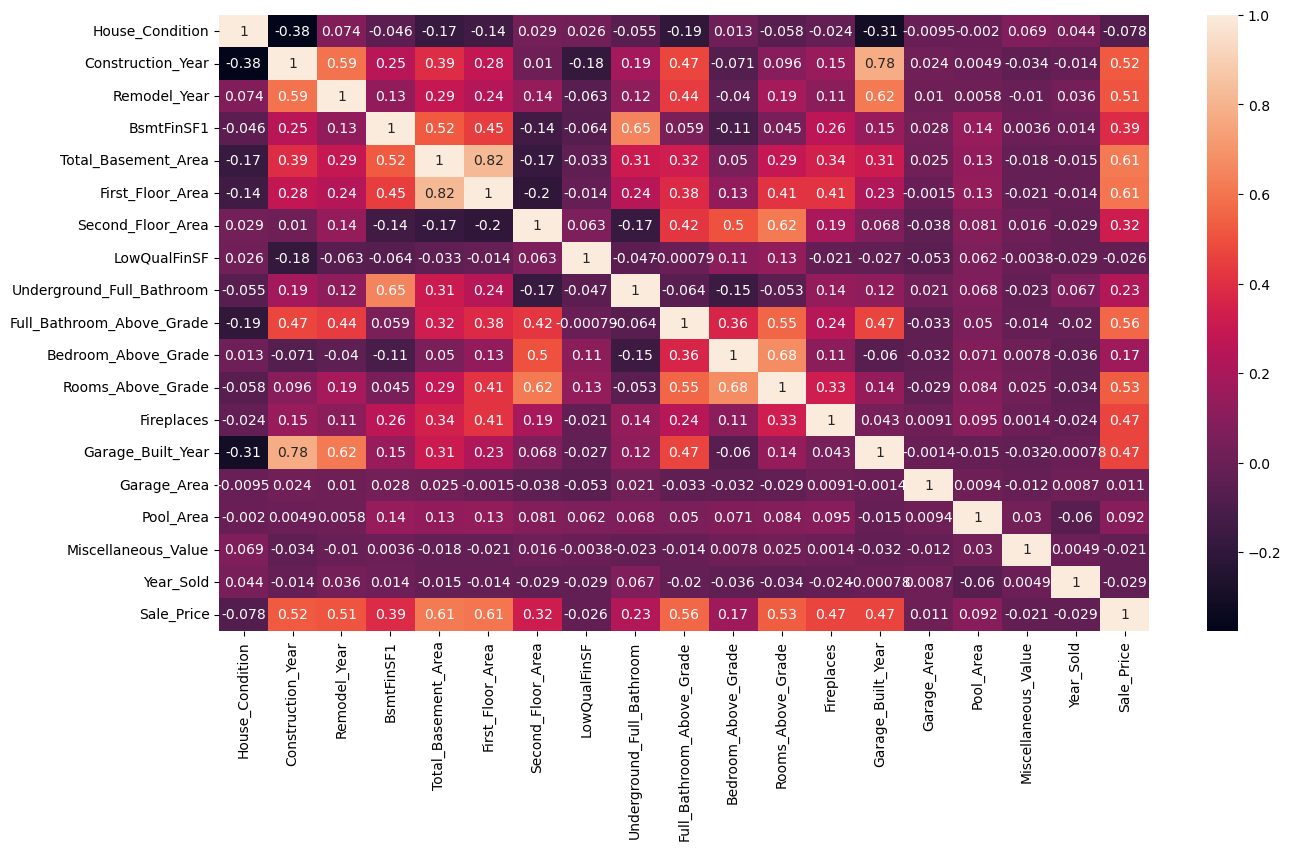

In [17]:
# Correlation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
# Correlation of independent columns with target variable
data.corr()['Sale_Price']

House_Condition             -0.077754
Construction_Year            0.522877
Remodel_Year                 0.507015
BsmtFinSF1                   0.386783
Total_Basement_Area          0.613792
First_Floor_Area             0.605971
Second_Floor_Area            0.319193
LowQualFinSF                -0.025642
Underground_Full_Bathroom    0.227551
Full_Bathroom_Above_Grade    0.560604
Bedroom_Above_Grade          0.168272
Rooms_Above_Grade            0.533682
Fireplaces                   0.466828
Garage_Built_Year            0.466670
Garage_Area                  0.010993
Pool_Area                    0.092389
Miscellaneous_Value         -0.021216
Year_Sold                   -0.028884
Sale_Price                   1.000000
Name: Sale_Price, dtype: float64

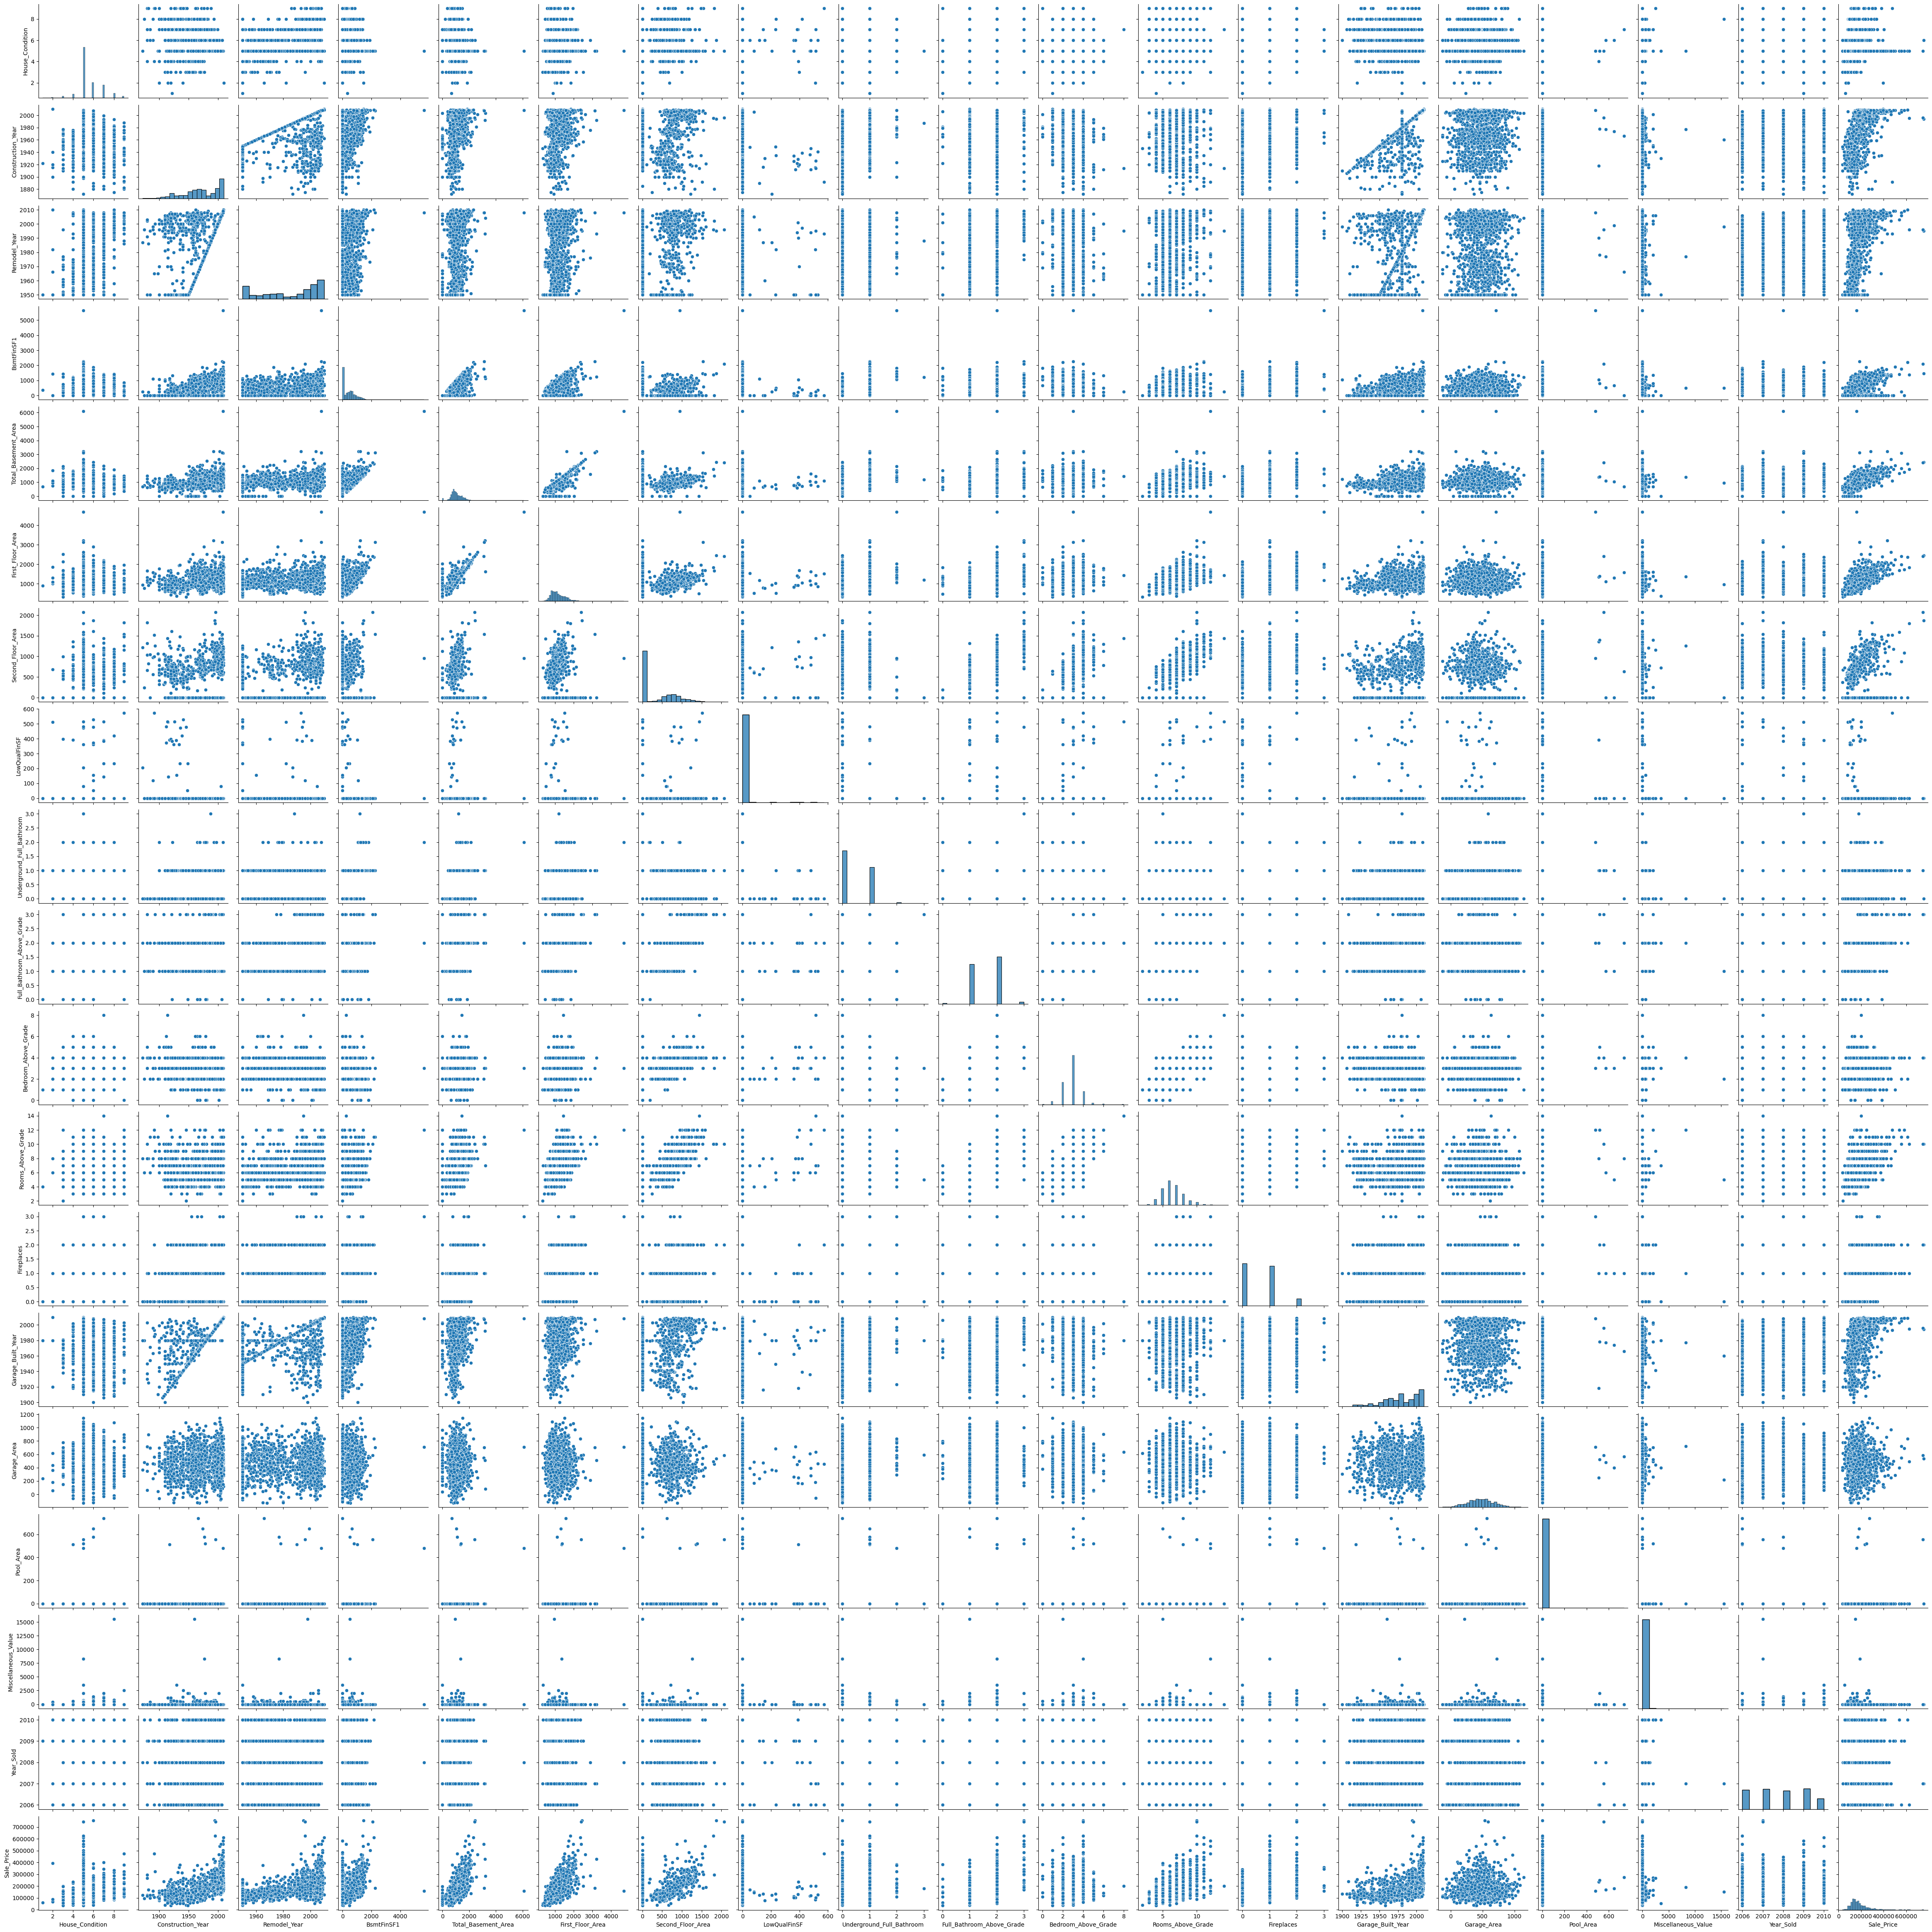

In [19]:
sns.pairplot(data)
plt.show()

In [20]:
def box_plot(df):
    for i in data:
        if data[i].dtype!='O':
            sns.boxplot(data[i])
            plt.title(i)
            plt.show()

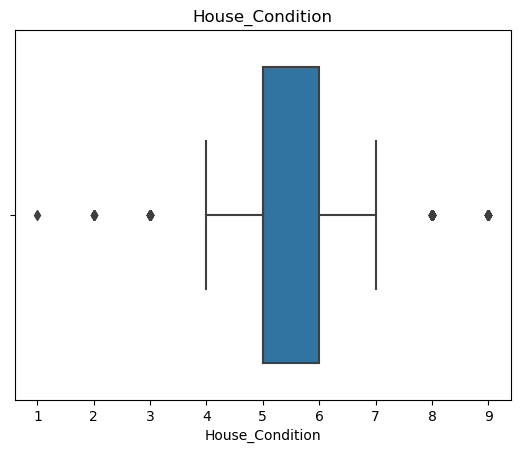

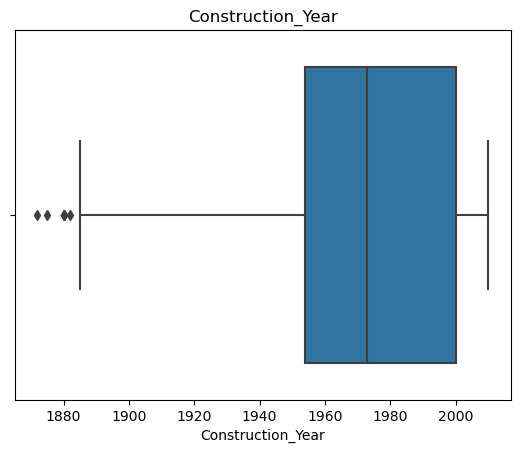

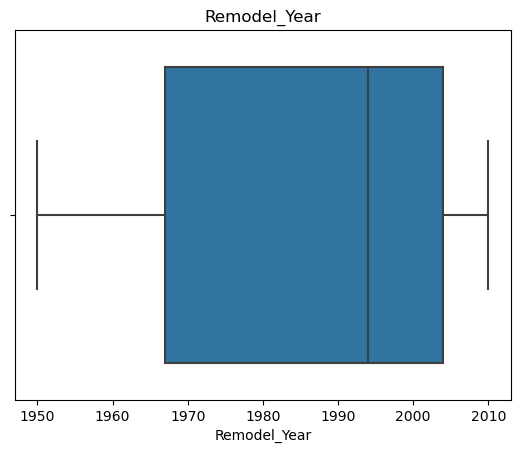

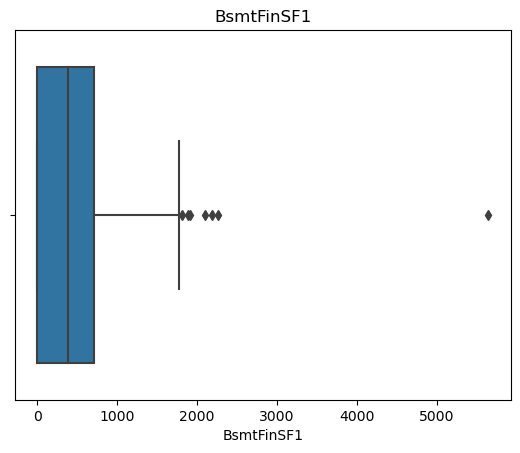

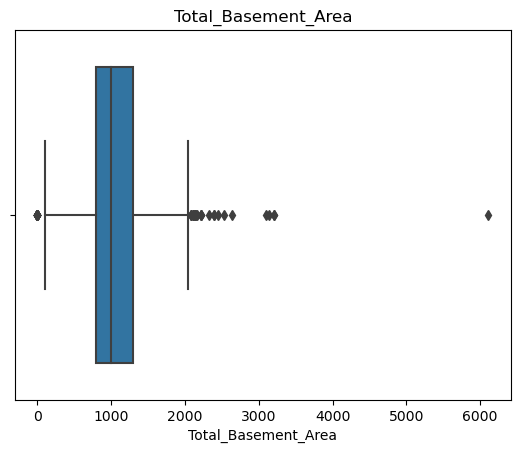

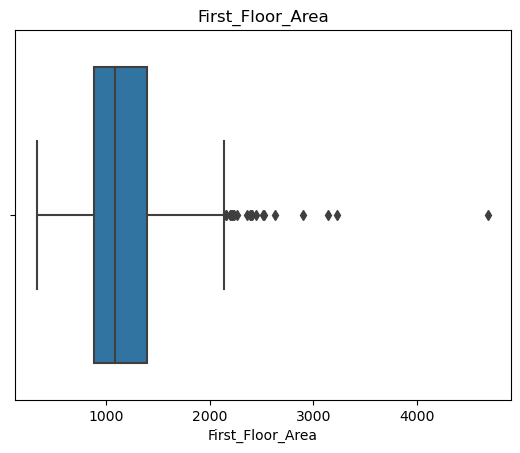

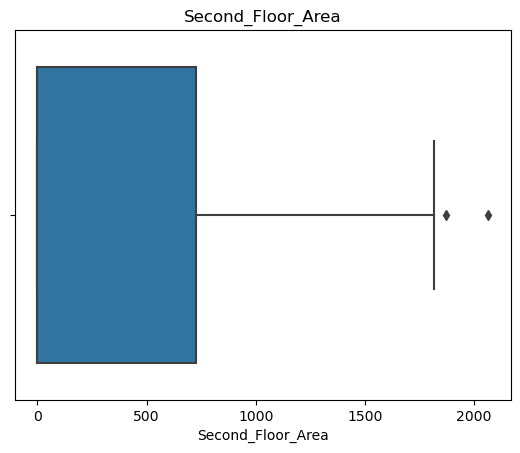

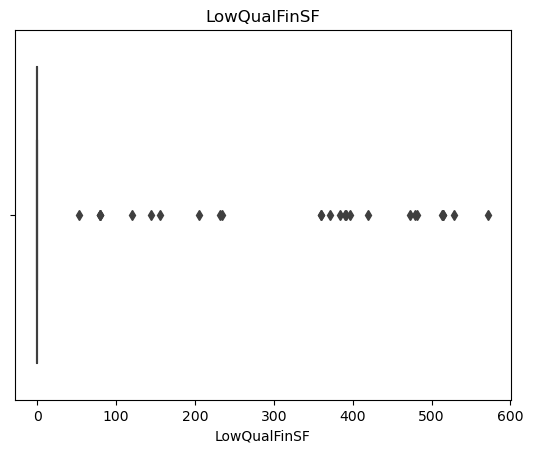

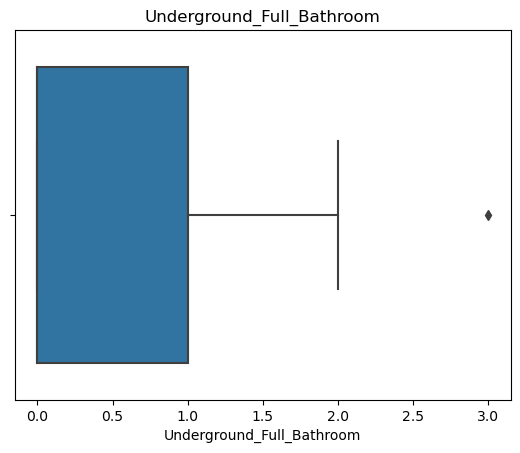

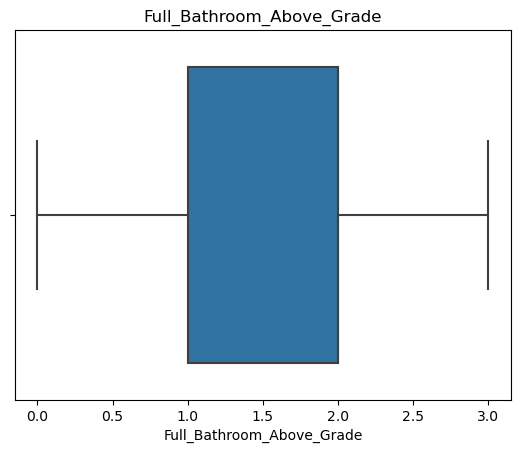

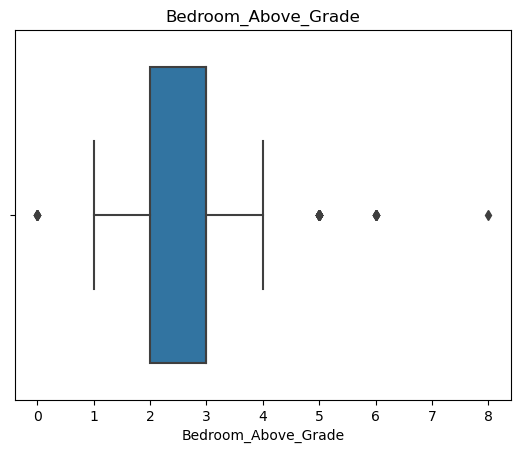

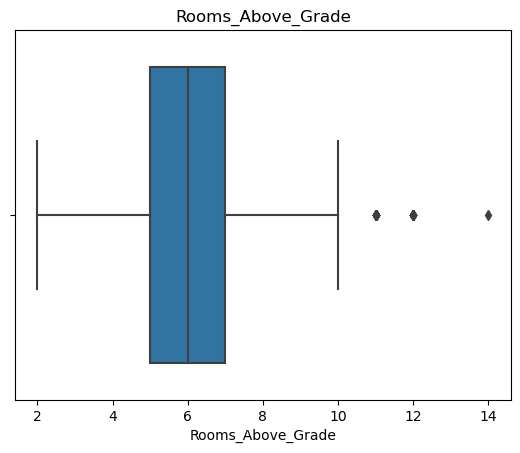

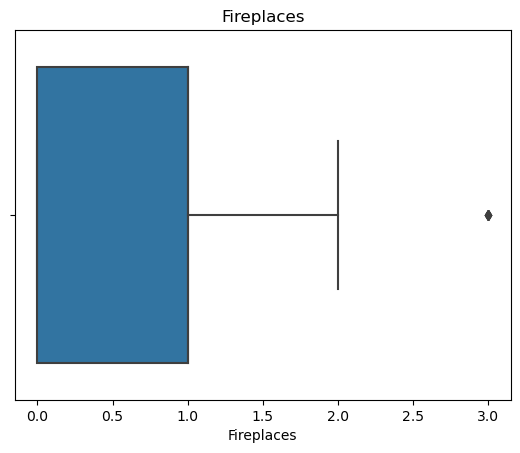

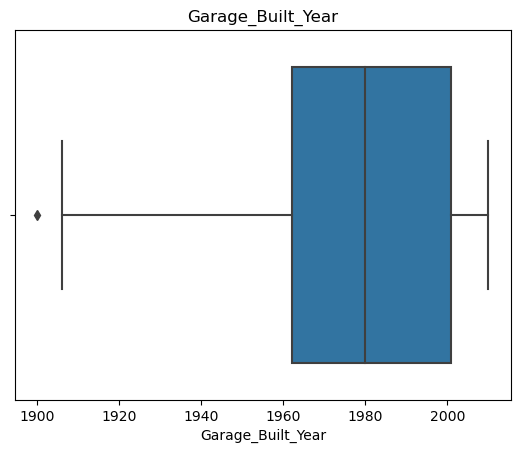

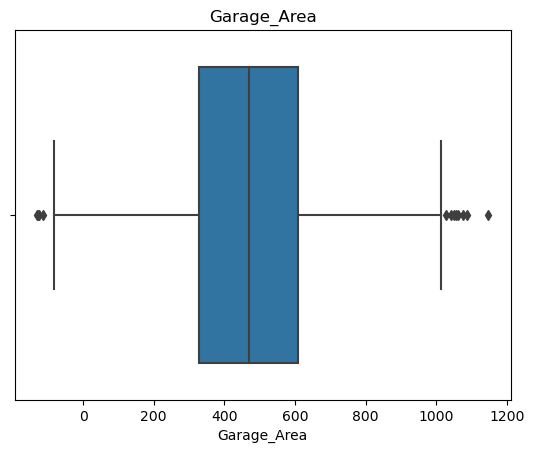

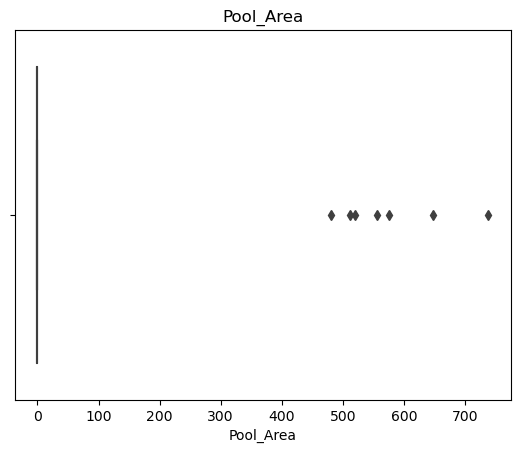

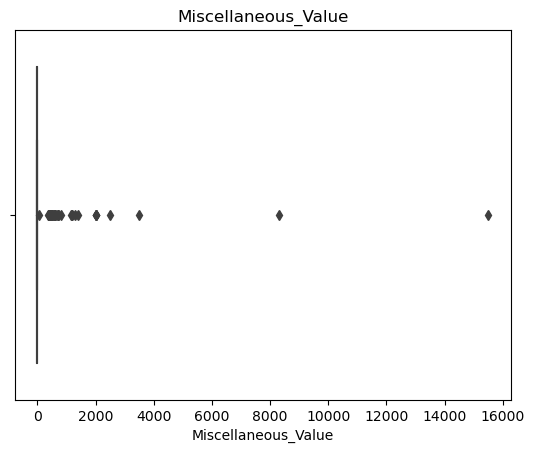

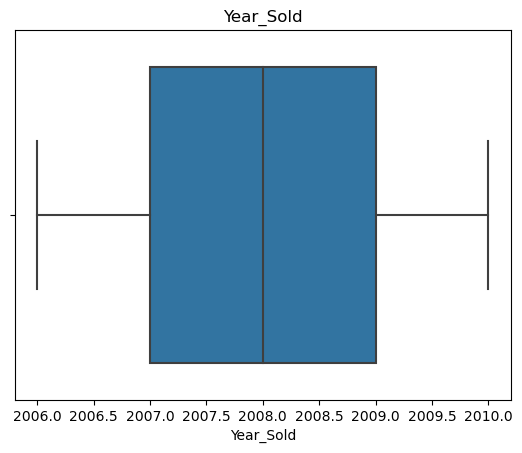

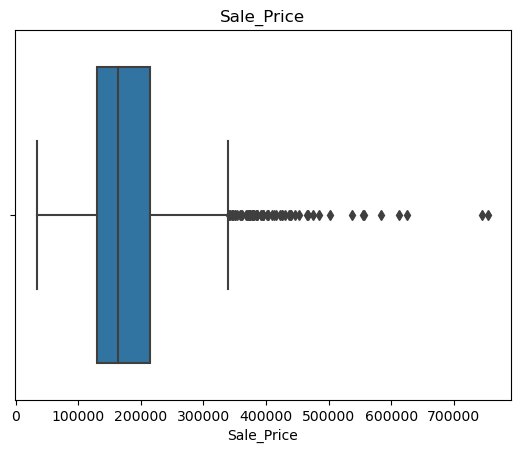

In [21]:
box_plot(data)

In [22]:
#outlier detection and treatment

def outliers_detection(data):
    columnsForOutlierDetection=[]
    for i in data:
        if data[i].dtype!='O' and i!='Sale_Price':
            columnsForOutlierDetection.append(i)
                                
    for column in columnsForOutlierDetection:
        
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3-Q1

        UB = Q3 + 1.5*IQR
        LB = Q1 - 1.5*IQR

        # Upper bound operation
        data[column] = np.where(data[column] > UB, UB, data[column])

        # Lower bound operation
        data[column] = np.where(data[column] < LB, LB, data[column])
    
    return data

In [23]:
outliers_detection(data)

Road_Type Property_Shape House_Type  House_Condition  Construction_Year  \
0        Paved            Reg       1Fam              5.0             2003.0   
1        Paved            Reg       1Fam              7.5             1976.0   
2        Paved            IR1       1Fam              5.0             2001.0   
3        Paved            IR1       1Fam              5.0             1915.0   
4        Paved            IR1       1Fam              5.0             2000.0   
...        ...            ...        ...              ...                ...   
1454     Paved            Reg       1Fam              5.0             2004.0   
1455     Paved            Reg       1Fam              5.0             1999.0   
1456     Paved            Reg       1Fam              6.0             1978.0   
1457     Paved            Reg       1Fam              7.5             1941.0   
1458     Paved            Reg       1Fam              6.0             1950.0   

      Remodel_Year  BsmtFinSF1  Total_Basement_Area Air_Conditioning  \
0           2003.0       706.0                856.0                Y   
1           1976.0       978.0               1262.0                Y   
2           2002.0       486.0                920.0                Y   
3           1970.0       216.0                756.0                Y   
4           2000.0       655.0               1145.0                Y   
...            ...         ...                  ...              ...   
1454        2005.0       410.0               1221.0                Y   
1455        2000.0         0.0                953.0                Y   
1456        1988.0       790.0               1542.0                Y   
1457        2006.0       275.0               1152.0                Y   
1458        1996.0        49.0               1078.0                Y   

      First_Floor_Area  ...  Kitchen_Quality  Rooms_Above_Grade  Fireplaces  \
0                856.0  ...               Gd                8.0         0.0   
1               1262.0  ...               TA                6.0         1.0   
2                920.0  ...               Gd                6.0         1.0   
3                961.0  ...               Gd                7.0         1.0   
4               1145.0  ...               Gd                9.0         1.0   
...                ...  ...              ...                ...         ...   
1454            1221.0  ...               Gd                6.0         0.0   
1455             953.0  ...               TA                7.0         1.0   
1456            2073.0  ...               TA                7.0         2.0   
1457            1188.0  ...               Gd                9.0         2.0   
1458            1078.0  ...               Gd                5.0         0.0   

      Garage  Garage_Built_Year  Garage_Area  Pool_Area  Miscellaneous_Value  \
0     Attchd             2003.0  1024.026710        0.0                  0.0   
1     Attchd             1976.0   196.316304        0.0                  0.0   
2     Attchd             2001.0   218.068403        0.0                  0.0   
3     Detchd             1998.0   696.996439        0.0                  0.0   
4     Attchd             2000.0   568.859882        0.0                  0.0   
...      ...                ...          ...        ...                  ...   
1454  Attchd             2004.0   689.060909        0.0                  0.0   
1455  Attchd             1999.0   644.100240        0.0                  0.0   
1456  Attchd             1978.0   180.864203        0.0                  0.0   
1457  Attchd             1941.0   439.363996        0.0                  0.0   
1458  Attchd             1950.0   603.143692        0.0                  0.0   

     Year_Sold  Sale_Price  
0       2008.0      208500  
1       2007.0      181500  
2       2008.0      223500  
3       2006.0      140000  
4       2008.0      250000  
...        ...         ...  
1454    2009.0      185000  
1455    2007.0      175000  
1456    

In [24]:
# Dummy Variable Creation
fullDf=pd.get_dummies(data)
fullDf.shape

(1459, 43)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(fullDf.drop(columns=["Sale_Price"]),
                                                 fullDf["Sale_Price"],
                                                 test_size=0.3,
                                                random_state=16)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 42)
(438, 42)
(1021,)
(438,)


In [27]:
Train_Scaling = StandardScaler().fit(X_train) # Train_Scaling contains means, std_dev of training dataset
X_train_Std = Train_Scaling.transform(X_train) # This step standardizes (executes the formula) the train data
X_test_Std  = Train_Scaling.transform(X_test) # This step standardizes (executes the formula) the test data

# Add the column names to trainX_Std, testX_Std
X_train= pd.DataFrame(X_train_Std, columns = X_train.columns)
X_test = pd.DataFrame(X_test_Std, columns = X_test.columns)

### Model

In [29]:
# function

model_scores = {}

def get_scores(pred, original_value, model_name):
    rmse = np.sqrt(mean_squared_error(original_value,pred))
    mape = (mean_absolute_percentage_error(original_value,pred))*100
    r2 = r2_score(original_value,pred)
    n=X_train.shape[0]
    p=X_train.shape[1]
    adj_r2 = 1-(((1-r2)*(n-1))/(n-p-1))
    model_scores[model_name] = [rmse, mape, r2,adj_r2]
    

    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print(f"R2 Score: {r2}")
    print(f"Adj_R2 Score: {adj_r2}")

In [30]:
def run_model( model, model_name):
    
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    get_scores(predictions, y_test, model_name)

In [31]:
run_model(LinearRegression(),'LinearRegression')

RMSE: 38881.19679567533
MAPE: 13.511729972302536
R2 Score: 0.7467114590158881
Adj_R2 Score: 0.7358340370104355


In [32]:
run_model(RandomForestRegressor(random_state = 42),'RandomForestRegressor')

RMSE: 37975.00525476935
MAPE: 11.884495729388686
R2 Score: 0.7583805013863572
Adj_R2 Score: 0.7480042038998818


In [33]:
run_model(DecisionTreeRegressor(random_state=42),'DecisionTreeRegressor')

RMSE: 49633.4578703615
MAPE: 16.6569502004055
R2 Score: 0.5872516374614871
Adj_R2 Score: 0.5695262476592197


In [34]:
run_model(KNeighborsRegressor(),'KNeighborsRegressor')

RMSE: 41736.30665489917
MAPE: 15.441773638682488
R2 Score: 0.7081468917830032
Adj_R2 Score: 0.6956133227184695


In [35]:
run_model(XGBRegressor(),'XGBRegressor')

RMSE: 43942.97992537113
MAPE: 13.011788503032554
R2 Score: 0.6764694450307993
Adj_R2 Score: 0.6625754948173981


### RandomForestRegressor is giving the lowest MAPE value.